# Alif Almuqsit

# Unduh Dataset dari Google Drive

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rfjmie2tTNwOkBmCaZ7phZiEWqLOxriB' -O 'dataset.zip'

--2022-01-21 13:00:10--  https://docs.google.com/uc?export=download&id=1rfjmie2tTNwOkBmCaZ7phZiEWqLOxriB
Resolving docs.google.com (docs.google.com)... 74.125.142.101, 74.125.142.113, 74.125.142.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bdehuplavo890i5nfqfiuuun9ni8j3js/1642770000000/09273374288160286847/*/1rfjmie2tTNwOkBmCaZ7phZiEWqLOxriB?e=download [following]
--2022-01-21 13:00:11--  https://doc-14-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bdehuplavo890i5nfqfiuuun9ni8j3js/1642770000000/09273374288160286847/*/1rfjmie2tTNwOkBmCaZ7phZiEWqLOxriB?e=download
Resolving doc-14-ag-docs.googleusercontent.com (doc-14-ag-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-14-ag-docs.googleusercontent.com (doc-14-ag-d

# Extract Dataset

In [2]:
!unzip -P "@Prosa.4i" "dataset.zip" -d "dataset"

Archive:  dataset.zip
  inflating: dataset/train_data_restaurant.tsv  
  inflating: dataset/test_data_restaurant.tsv  
  inflating: dataset/readme          


# Preprocessing

In [ ]:
# Perlu diinstall

!pip install sastrawi

In [3]:
# Perlu diimport

import re
import pandas as pd
import seaborn as sns
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## Baca dataset dalam bentuk pandas

In [4]:
train_data = pd.read_csv("dataset/train_data_restaurant.tsv", sep="\t", names=["sentences", "sentiment"])
train_data

,sentences,sentiment
0,Saya makan di sini dengan menggunakan voucher ...,negative
1,Mas indosat buat main game enemy has been slai...,negative
2,Trus sy percuma dong update no hp terbaru ke c...,negative
3,jika kita pilih dia maka akan ada lebih dari 3...,negative
4,Dikarenakan adik saya suka dengan restoran ini...,negative
...,...,...
1775,sangat suka minuman di sini selain merah meria...,positive
1776,Saat pertama saya melihat suasana di damai res...,positive
1777,Restoran yang terletak di kawasan Intercontine...,positive
1778,Pilihan kaya baso2 dll ny banyakk di sinii mac...,positive


## Visualisasi Persebaran Dataset

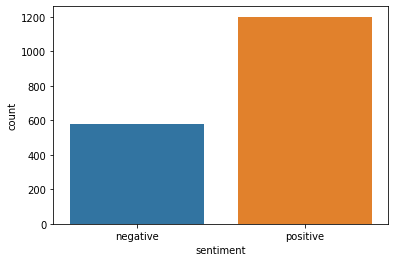

In [7]:
sns.countplot(x="sentiment", data=train_data)

In [8]:
train_data["sentiment"].value_counts()

positive    1200
negative     580
Name: sentiment, dtype: int64

## Cleaning Data

In [42]:
# Saya ambil Stopword dari library yang telah disediakan oleh Satrawi
stop_factory = StopWordRemoverFactory()

# Saya tambah dengan beberapa kata yang terdapat dalam dataset dan tidak terlalu berpengaruh dalam
# pelatihan model sentimen analisis
stopword = stop_factory.get_stop_words() + ['dll', 'sy', 'trus', 'ny', 'has', 'been', 'di', 'sih', 'ke']

# Saya hapus beberapa kata dari stopword karena kata ini mengindikasikan sentimen negatif
stopword.remove('tidak')
stopword.remove('belum')
print(stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharu

In [43]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:S|{^A-Za-z}+"

def preprocessing(sentences):
  sentences = re.sub(TEXT_CLEANING_RE, '', str(sentences).lower()).strip()
  tokens = []
  for token in sentences.split():
    if token not in stopword:
      token = stemmer.stem(token)
      tokens.append(token)
  return " ".join(tokens)

In [44]:
train_data['clean_sentences'] = train_data.sentences.apply(lambda x: preprocessing(x))
train_data

,sentences,sentiment,clean_sentences
0,Saya makan di sini dengan menggunakan voucher ...,negative,makan sini guna voucher disdus paket nasi ayam...
1,Mas indosat buat main game enemy has been slai...,negative,mas indosat buat main game enemy slain susah b...
2,Trus sy percuma dong update no hp terbaru ke c...,negative,percuma dong update no hp baru cs cab bni kalo...
3,jika kita pilih dia maka akan ada lebih dari 3...,negative,pilih lebih 300 kampung gusur
4,Dikarenakan adik saya suka dengan restoran ini...,negative,karena adik suka restoran ini akhir mampir sin...
...,...,...,...
1775,sangat suka minuman di sini selain merah meria...,positive,sangat suka minum sini merah riah rasa enak ra...
1776,Saat pertama saya melihat suasana di damai res...,positive,pertama lihat suasana damai resto sangat ramai...
1777,Restoran yang terletak di kawasan Intercontine...,positive,restoran letak kawasan intercontinental hotel ...
1778,Pilihan kaya baso2 dll ny banyakk di sinii mac...,positive,pilih kaya baso2 banyakk sini macem2 unik2 su...


# Training

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss

In [45]:
# Saya menggunakan TFIDF Vektorisasi dan Arsitektur Linear Regression

vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
X_train = vectorizer.fit_transform(train_data.clean_sentences)
y_train = train_data['sentiment']

LR_ = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(X_train, y_train)
# Didapatkan model dalam bentuk variabel LR_

# Preprocessing Data Test

## Baca Dataset dalam Bentuk Pandas

In [5]:
test_data = pd.read_csv("dataset/test_data_restaurant.tsv", sep="\t", names=["sentences", "sentiment"])
test_data

,sentences,sentiment
0,"Tempatnya sih menarik, mudah dijangkau dari se...",negative
1,lokasi strategis penasaran karena daerah situ ...,negative
2,"Sesuai namanya, restoran ini unik dalam menyaj...",negative
3,Saya datang ketika petang dan hujan deras temp...,negative
4,"Kalao mau ke sana jangan pas malem sih, soalny...",negative
...,...,...
180,"Waktu itu ke sana pas malam, and cuacanya ding...",positive
181,Lokasinya agak masuk-masuk ke dalam perumahan ...,positive
182,sengaja saya dan pasangan dan juga teman ingin...,positive
183,Lokasinya memang sedikit tersembunyi di sudut ...,positive


## Visualisasi Persebaran Data pada Data Test

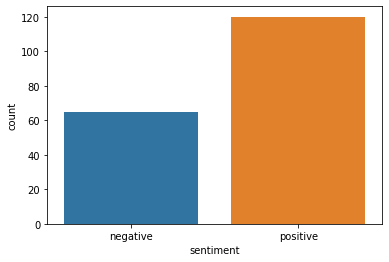

In [21]:
sns.countplot(x="sentiment", data=test_data)

In [23]:
test_data["sentiment"].value_counts()

positive    120
negative     65
Name: sentiment, dtype: int64

## Cleaning pada Data Test

In [46]:
test_data['clean_sentences'] = test_data.sentences.apply(lambda x: preprocessing(x))
test_data

,sentences,sentiment,clean_sentences
0,"Tempatnya sih menarik, mudah dijangkau dari se...",negative,tempat tarik mudah jangkau segala arah menu sa...
1,lokasi strategis penasaran karena daerah situ ...,negative,lokasi strategis penasaran daerah situ rame pa...
2,"Sesuai namanya, restoran ini unik dalam menyaj...",negative,sesuai nama restoran unik saji makan pakai pir...
3,Saya datang ketika petang dan hujan deras temp...,negative,datang petang hujan deras tempat parkir cukup ...
4,"Kalao mau ke sana jangan pas malem sih, soalny...",negative,kalao mau sana jangan pas malem sih soal bakal...
...,...,...,...
180,"Waktu itu ke sana pas malam, and cuacanya ding...",positive,waktu sana pas malam and cuaca dingiiin sekali...
181,Lokasinya agak masuk-masuk ke dalam perumahan ...,positive,lokasi masuk rumah besar jangkau guna kendara ...
182,sengaja saya dan pasangan dan juga teman ingin...,positive,sengaja pasang teman eksplor tempat wisata ban...
183,Lokasinya memang sedikit tersembunyi di sudut ...,positive,lokasi memang sedikit sembunyi sudut buah ruma...


# Testing Model menggunakan Data Test

In [47]:
X_test = vectorizer.transform(test_data.clean_sentences)
y_test = test_data['sentiment']

In [48]:
yhat = LR_.predict(X_test)
print('F1 Score : ', f1_score(y_test, yhat, average='weighted'))

yhat_prob = LR_.predict_log_proba(X_test)
print('Log Loss : ', log_loss(y_test, yhat_prob))

# Digunakan matriks F1 Score dan Loss sebagai penilaian terhadap model

F1 Score :  0.8355768896309437
Log Loss :  0.6931471805599453


# Prediksi kalimat menggunakan Model

In [58]:
def prediksi_komentar(model, comment):
  result = model.predict(vectorizer.transform([comment]))
  print(result)

In [62]:
prediksi_komentar(LR_, 'Saya tidak suka makan bakso')

['positive']


# Menyimpan Model dan Vectorizer

In [54]:
import pickle

In [67]:
file_vectorizer = 'vectorizer.pickle'
pickle.dump(vectorizer, open(file_vectorizer, 'wb'))

In [64]:
file_model = 'LinearRegression.model'
pickle.dump(LR_, open(file_model, 'wb'))

# Mengunduh Model dan Vectorizer

In [65]:
from google.colab import files

In [68]:
files.download('LinearRegression.model')
files.download('vectorizer.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>